# Logistic Regression

## Dataset Stocks

### Import needed libraries and read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random
import time
import datetime

x_train = pd.read_csv("train.csv")
x_train = x_train.drop(['Date'], axis=1)
x_test = pd.read_csv("test.csv")
x_test = x_test.drop(['Date'], axis=1)
x_test.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,2683.73,2695.81,2695.89,2682.36,1846463232
1,2697.85,2713.06,2714.37,2697.77,2090595328
2,2719.31,2723.99,2729.29,2719.07,2100767744
3,2731.33,2743.15,2743.45,2727.92,1918869120
4,2742.67,2747.71,2748.51,2737.60,1894823936


### Getting the result of Stocks Up and Down

We have to obtain the stocks up and down status by comparing close prices within two following days.
Make up a list y(up and down) for both train and test data. The return data will be our y_train and y_test, we do not need to merge x and y together anymore. They are separated now.

In [2]:
# iterate over rows with iterrows()
close_prices = x_train['Close Price']
up_down_train = [0]
for i in range(1, len(close_prices)):
    if close_prices[i] - close_prices[i-1] > 0:
        up_down_train.append(1)
    else:
        up_down_train.append(0)
up_down_train

y_train = pd.Series(up_down_train)

close_prices = x_test['Close Price']
up_down_test = [0]
for i in range(1, len(close_prices)):
    if close_prices[i] - close_prices[i-1] > 0:
        up_down_test.append(1)
    else:
        up_down_test.append(0)
up_down_test

y_test = pd.Series(up_down_test)

### This function plot the feature

we can analyse the feature by it's distribution over the result

In [3]:
def plot_feature(data, feature_name, result):
    plt.figure(figsize=(10, 3))
    plt.scatter(data[feature_name], result)
    plt.xlabel(feature_name)
    plt.ylabel('Up and Down')
    plt.show()

### Function that calculate the accuracu for us

In [4]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

### Import further more package for Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [6]:
x_train.dropna().describe()

,Open Price,Close Price,High Price,Low Price,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,1656.142686,1656.767562,1664.427054,1647.425128,2.948755e+09
std,485.292193,485.226120,484.808706,485.576116,1.351675e+09
min,679.280000,676.530000,695.270000,666.790000,5.181584e+08
25%,1238.602500,1239.337500,1246.695000,1227.587500,2.048980e+09
50%,1649.135000,1650.405000,1656.145000,1639.600000,2.506637e+09
75%,2070.300000,2071.190000,2079.507500,2058.757500,3.373334e+09
max,2692.710000,2690.160000,2694.970000,2685.920000,9.120100e+09


In [7]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.mean_squared_error(y, preds)

In [8]:
alphas = np.linspace(start=0, stop=0.5, num=6)
alphas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [9]:
mses = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, normalize=True)
    mse = model_selection.cross_val_score(ridge, x_train, y_train, cv=5, scoring=scorer)
    mses.append(mse.mean())
        

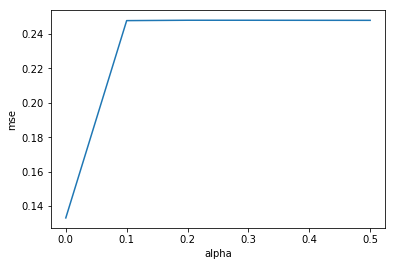

In [10]:
plt.plot(alphas, mses)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [11]:
best_alpha = alphas[np.argmin(mses)]
best_alpha

0.0

In [12]:
ridge = linear_model.Ridge(alpha=best_alpha, normalize=True)
ridge.fit(x_train, y_train)
train_preds = ridge.predict(x_train)
test_preds = ridge.predict(x_test)
train_mse = metrics.mean_squared_error(y_train, train_preds)
test_mse = metrics.mean_squared_error(y_test, test_preds)
print('Train MSE: %s' % train_mse)
print('Test MSE: %s' % test_mse)

Train MSE: 0.12696200421951212
Test MSE: 0.2774037129870657


In [13]:
for i in range(0, len(x_train.columns)):
    print('Coefficient for %s:%s\t%s' %
          (x_train.columns[i], 
           '\t' if len(x_train.columns[i]) < 7 else '',
           ridge.coef_[i]))

Coefficient for Open Price:	-0.030494102247274543
Coefficient for Close Price:	0.020299523321612965
Coefficient for High Price:	0.004630137630256997
Coefficient for Low Price:	0.005569014766322785
Coefficient for Volume:		5.539475520257828e-12


### Logistic Regression

In [14]:
clf = linear_model.LogisticRegression().fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Result of training 

In [15]:
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: %s' % train_acc)
print('Test accuracy: %s' % test_acc)

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699


### Redo by dropping Volume

In [16]:
x_train.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,902.99,931.80,934.73,899.35,4048270080
1,929.17,927.45,936.63,919.53,5413910016
2,931.17,934.70,943.85,927.28,5392620032
3,927.45,906.65,927.45,902.37,4704940032
4,905.73,909.73,910.00,896.81,4991549952


In [17]:
x_train = x_train.drop(['Volume'], axis=1)
x_test = x_test.drop(['Volume'], axis=1)

In [18]:
clf = linear_model.LogisticRegression().fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###  Promissing result by dropping Volume

In [19]:
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: %s' % train_acc)
print('Test accuracy: %s' % test_acc)

Train accuracy: 0.9394876325088339
Test accuracy: 0.8214285714285714


### Improve the model

In [20]:
clf = linear_model.LogisticRegression(solver='lbfgs', max_iter=100000, tol=0.00000001).fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: %s' % train_acc)
print('Test accuracy: %s' % test_acc)

Train accuracy: 0.9403710247349824
Test accuracy: 0.8214285714285714


## Dataset Titanic 

### compare what dataset can be done with classifer

In [21]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Process like the last practice do

#### Drop relatively useless features

In [22]:
df = df.drop('PassengerId', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)

In [23]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Deal with NaN attributes

In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### fill in average age for age is NaN

In [25]:
age = df['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
df['Age'].fillna(avgage, inplace = True)

### Cabin is useless now, too mana NaN

In [26]:
df = df.drop('Cabin', axis = 1)
df = df.drop('Embarked', axis = 1)

### Map the sex to integer

In [27]:
sex_map = {'male' : 0, 'female' :1}
df['Sex'] = df['Sex'].map(sex_map)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


### preparation of train and test

In [28]:
def split(data):
    # control randomization for reproducibility
    np.random.seed(42)
    random.seed(42)
    train, test = model_selection.train_test_split(data)
    x_train = train.loc[:, train.columns != 'Survived']
    y_train = train['Survived']
    x_test = test.loc[:, test.columns != 'Survived']
    y_test = test['Survived']
    return x_train, y_train, x_test, y_test

In [29]:
x_train, y_train, x_test, y_test = split(df)

In [30]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
709,3,0,23.799293,1,1,15.2458
439,2,0,31.000000,0,0,10.5000
840,3,0,20.000000,0,0,7.9250
720,2,1,6.000000,0,1,33.0000
39,3,1,14.000000,1,0,11.2417


In [31]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [32]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
298,1,0,23.799293,0,0,30.5000
884,3,0,25.000000,0,0,7.0500
247,2,1,24.000000,0,2,14.5000
478,3,0,22.000000,0,0,7.5208
305,1,0,0.920000,1,2,151.5500


In [33]:
y_train.head()

298    1
884    0
247    1
478    0
305    1
Name: Survived, dtype: int64

In [34]:
clf = linear_model.LogisticRegression().fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: %s' % train_acc)
print('Test accuracy: %s' % test_acc)

Train accuracy: 0.7979041916167665
Test accuracy: 0.7937219730941704
